# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [59]:
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from plotnine import *

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [60]:
X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [61]:
ct = ColumnTransformer([
  ("dummify",
  OneHotEncoder(sparse_output = False, handle_unknown = "ignore"),
  make_column_selector(dtype_include=object)),
  ("standardize",
  StandardScaler(),
  make_column_selector(dtype_include=np.number))
  ], remainder = "passthrough"
)

In [66]:
#Model 1: Best LR
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_reg", LinearRegression())]
).set_output(transform = "pandas")

lr_pipeline.fit(X_train, y_train)

y_pred = lr_pipeline.predict(X_test)

mse1 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse1}")

Mean Squared Error: 0.5943223353794641


In [67]:
#Model 2: KNN (K = 3)
knn3_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn_3", KNeighborsRegressor(n_neighbors=3))]
).set_output(transform = "pandas")

knn3_pipeline.fit(X_train, y_train)


y_pred = knn3_pipeline.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse2 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse2}")

Mean Squared Error: 0.9045105820105817


In [68]:
#Model 3: KNN (K = 6)
knn5_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn_3", KNeighborsRegressor(n_neighbors=6))]
).set_output(transform = "pandas")

knn5_pipeline.fit(X_train, y_train)


y_pred = knn5_pipeline.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse3 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse3}")

Mean Squared Error: 0.7325198412698413


In [69]:
#Model 4: Decision Tree
dt_pipeline = Pipeline(
  [("preprocessing", ct),
  ("decision_tree", DecisionTreeRegressor())]
).set_output(transform = "pandas")

dt_pipeline.fit(X_train, y_train)

y_pred = dt_pipeline.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse4 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse4}")

Mean Squared Error: 1.1109523809523807


In [70]:
plotdf = pd.DataFrame({ 
    "MSE": [mse1, mse2, mse3, mse4],
    "Predictor Variables": [7, 7, 7, 7],
    "Regression Technique": ["Linear", "KNN (K=3)", "KNN (K=5)", "Decision Tree"]
})
plotdf

,MSE,Predictor Variables,Regression Technique
0,0.594322,7,Linear
1,0.904511,7,KNN (K=3)
2,0.732520,7,KNN (K=5)
3,1.110952,7,Decision Tree


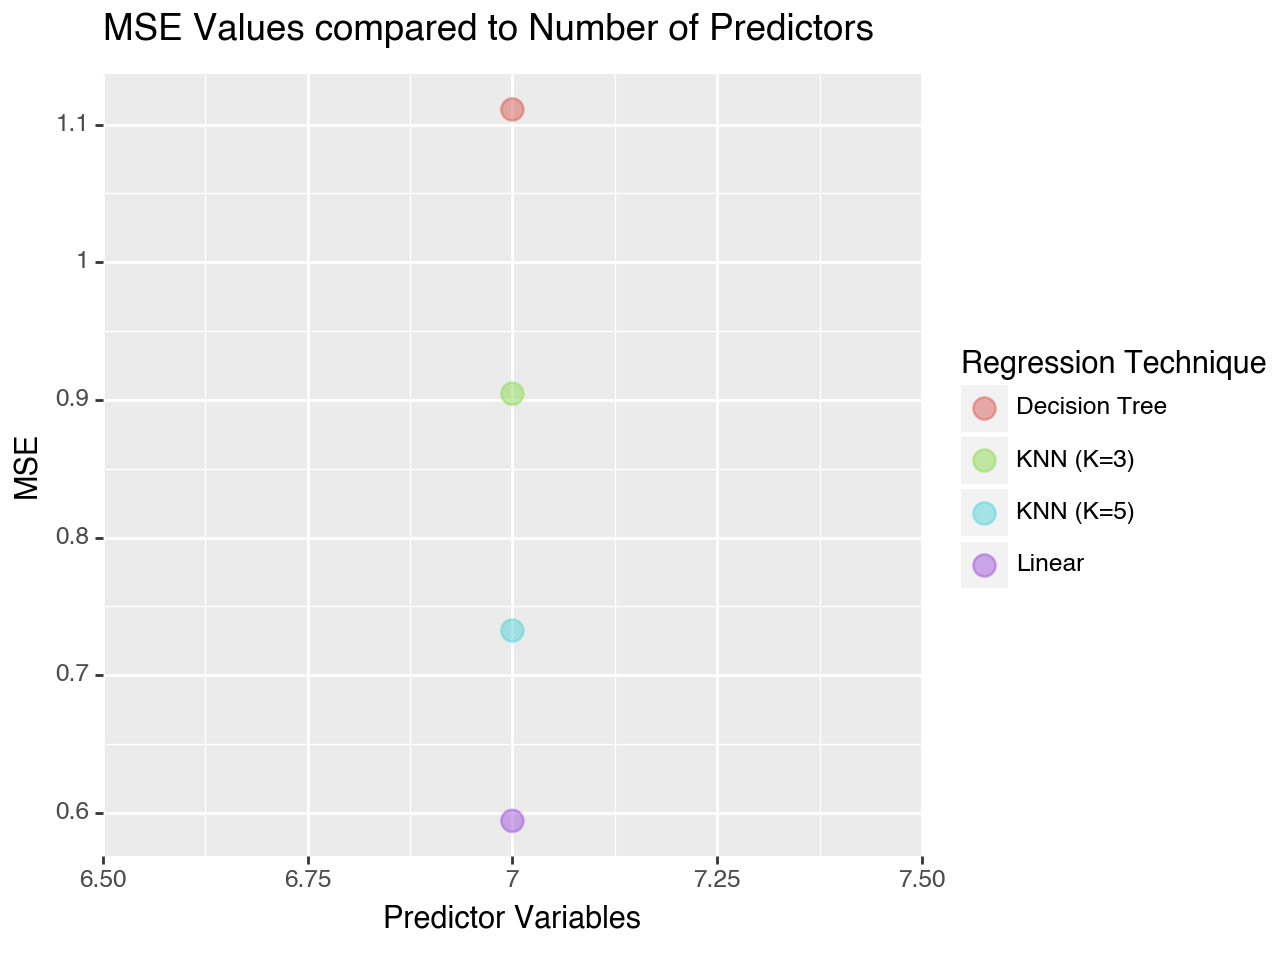

<Figure Size: (640 x 480)>

In [71]:
(ggplot(plotdf, aes(y = "MSE", x = "Predictor Variables", color = "Regression Technique"))
  + geom_point(size = 4, alpha = 0.5)
  + labs(title = "MSE Values compared to Number of Predictors"))

Since we did not specify branches, the Decision Tree overfit the training and did terribly against the test data. According to this plot, Linear model performed the best.